<a href="https://colab.research.google.com/github/fxnnxc/Movie_Sentiment_Classification/blob/master/hdf_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pandas import HDFStore
import pandas as pd

In [0]:
hdf = pd.read_hdf('/content/Adventure_Avatar.h5', encoding="utf-8")

In [0]:
# Make df for plotting

# Plotting
from scipy.interpolate import interp1d
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def make_multispeaker_sent(df, decreasing):
    name_list = df.iloc[:,0]
    sent_list = df.iloc[:,2]

    #declare return df
    df = pd.DataFrame()
    
    unique_name = list(set(name_list))
    unique_name.sort()
    # append person
    for person in  unique_name:
        df[person] = sent_list

    # not talker dealing
    for i in df.index:
        for c in df.columns:
            if name_list[i] != c:
                df.loc[i,c] = 100
    df.loc[-1,]= 0
    df =df.sort_index()        
    for i in df.index:
        for c in df.columns:
            if df.loc[i,c] == 100:
                prev = df.loc[i-1,c]
                if prev <0.05 and prev>-0.05:
                     df.loc[i,c]=0
                elif prev>0:
                    df.loc[i,c] = df.loc[i-1,c]-decreasing
                else:
                    df.loc[i,c] = df.loc[i-1,c]+decreasing
    df.loc[len(df)-1,]= df.loc[len(df)-2,]
    df.loc[len(df)-2,]= df.loc[len(df)-3,]
    return df

def plot_time_sentiment(df, name):
    
    new_index = np.arange(-1, len(df)-2, 0.01)
    df2 = pd.DataFrame(index = new_index)
    
    s = ''.join(df.columns)

    
    for c in df.columns:
        f1 = interp1d(df.index, df[c], kind='cubic')
        df2[c] = f1(new_index)
     
    df2.index = new_index
    
    ax2 = df2.plot.line()
    ax2.set_title(name)
    ax2.set_xlabel("time")
    ax2.set_ylabel("Sentiment")
    ax2.plot(new_index, [0 for i in new_index],'r')

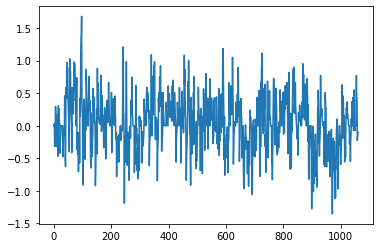

In [0]:
plt.plot(hdf['value'])

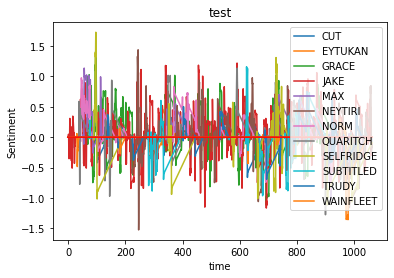

In [0]:
df = make_multispeaker_sent(hdf, 0.01)
plot_time_sentiment(df, "test")